# Azure Demand Forecasting
## Notebook 02: Data Cleaning and Merging
### Milestone 1: Data Collection & Preparation


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the dataset and formating the date column to standard date column 

In [12]:
# Create figures folder if it does not exist
figures_dir = '../reports/figures'
os.makedirs(figures_dir, exist_ok=True)

# Load datasets using relative path from notebooks folder
azure_df = pd.read_csv('../data/raw/azure_usage.csv')
external_df = pd.read_csv('../data/raw/external_factors.csv')

# Convert 'date' columns to datetime for merging and time series analysis
azure_df['date'] = pd.to_datetime(azure_df['date'])
external_df['date'] = pd.to_datetime(external_df['date'])


## Data Quality Checks

In [13]:
print("Missing values in Azure usage data:")
print(azure_df.isnull().sum())

print("Missing values in External factors data:")
print(external_df.isnull().sum())


### Handling Missing Values - Missing values found in `usage_storage` will be filled using forward fill method.

if azure_df['usage_storage'].isnull().any():
    azure_df['usage_storage'] = azure_df['usage_storage'].fillna(method='ffill')
    print("Filled missing values in 'usage_storage' using forward fill.")
else:
    print("No missing values in 'usage_storage' to fill.")


Missing values in Azure usage data:
date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64
Missing values in External factors data:
date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64
No missing values in 'usage_storage' to fill.


## Merging Datasets


In [14]:
# Merge on date with left join to keep all usage records
merged_df = pd.merge(azure_df, external_df, on='date', how='left')

# Show the first few rows of merged data to verify
merged_df.head()


,date,region,resource_type,usage_cpu,usage_storage,users_active,economic_index,cloud_market_demand,holiday
0,2023-01-01,East US,VM,88,1959,470,104.97,0.99,1
1,2023-01-01,East US,Storage,92,1595,388,104.97,0.99,1
2,2023-01-01,East US,Container,70,621,414,104.97,0.99,1
3,2023-01-01,West US,VM,60,1982,287,104.97,0.99,1
4,2023-01-01,West US,Storage,85,1371,351,104.97,0.99,1


## 5. 📈 Visualizations
- Total CPU usage trend over time  


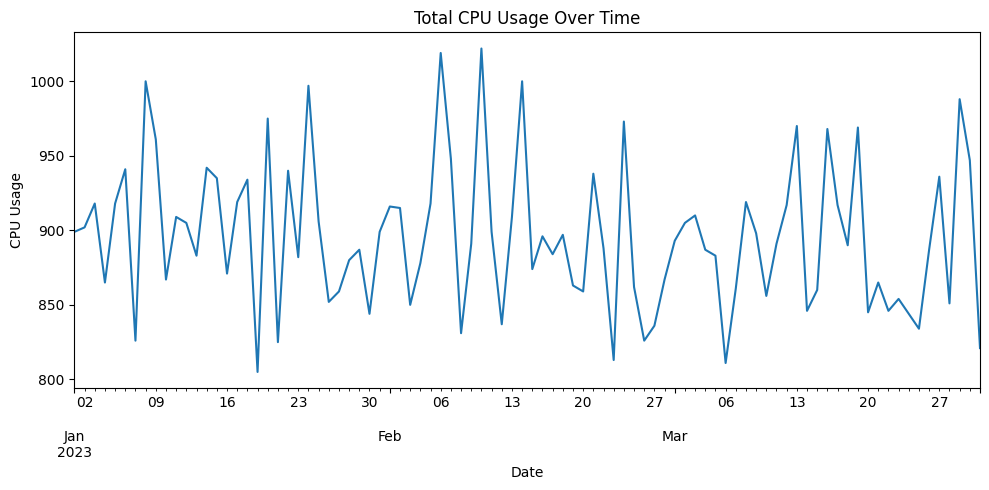

Saved total CPU usage over time plot


In [15]:
plt.figure(figsize=(10, 5))
merged_df.groupby('date')['usage_cpu'].sum().plot()
plt.title("Total CPU Usage Over Time")
plt.xlabel("Date")
plt.ylabel("CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/total_cpu_usage_over_time.png')
plt.show()
plt.close()
print("Saved total CPU usage over time plot")

- Plot region-wise average CPU usage bar chart and save

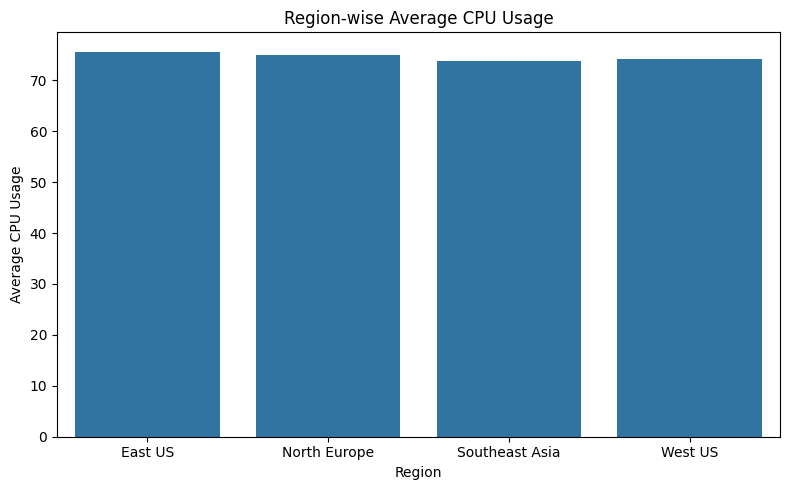

Saved region-wise average CPU usage plot


In [16]:
plt.figure(figsize=(8,5))
region_avg = azure_df.groupby('region')['usage_cpu'].mean().reset_index()
sns.barplot(data=region_avg, x='region', y='usage_cpu')
plt.title("Region-wise Average CPU Usage")
plt.xlabel("Region")
plt.ylabel("Average CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/avg_cpu_usage_by_region.png')
plt.show()
plt.close()
print("Saved region-wise average CPU usage plot")


C:\Users\mahem\AppData\Local\Temp\ipykernel_17072\865737577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_avg, x='region', y='usage_cpu', palette='viridis')


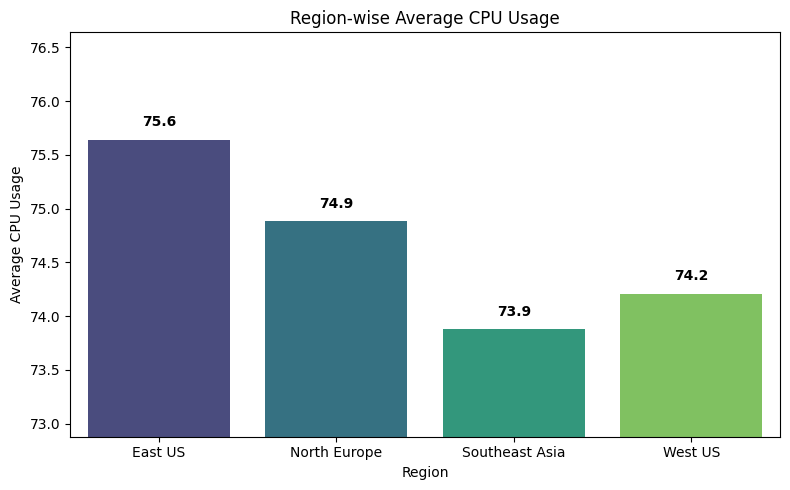

Saved improved region-wise average CPU usage plot


In [17]:
plt.figure(figsize=(8,5))
region_avg = azure_df.groupby('region')['usage_cpu'].mean().reset_index()
ax = sns.barplot(data=region_avg, x='region', y='usage_cpu', palette='viridis')

# Focus Y-axis on actual data range
min_val = region_avg['usage_cpu'].min()
max_val = region_avg['usage_cpu'].max()
plt.ylim(min_val - 1, max_val + 1)

# Add value labels on bars
for i, v in enumerate(region_avg['usage_cpu']):
    ax.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title("Region-wise Average CPU Usage")
plt.xlabel("Region")
plt.ylabel("Average CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/avg_cpu_usage_by_region.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Saved improved region-wise average CPU usage plot")


- Plot correlation heatmap and save

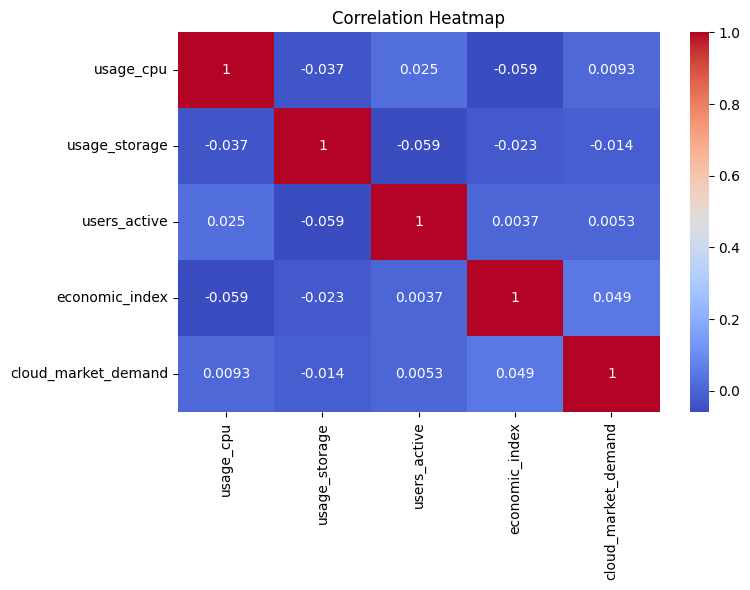

Saved correlation heatmap


In [18]:
plt.figure(figsize=(8,6))
corr_cols = ['usage_cpu', 'usage_storage', 'users_active', 'economic_index', 'cloud_market_demand']
sns.heatmap(merged_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f'{figures_dir}/correlation_heatmap.png')
plt.show()
plt.close()
print("Saved correlation heatmap")


## Save Cleaned and Merged Dataset


In [19]:
# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save merged data to CSV file for downstream tasks
merged_df.to_csv('../data/processed/cleaned_merged.csv', index=False)
print('Cleaned and merged dataset saved to data/processed/cleaned_merged.csv')


Cleaned and merged dataset saved to data/processed/cleaned_merged.csv
